**Artificial Neural Networks**

input(x) * Weight(w) * Bias(b) = output(y)

**Variants of Gradient Descent**

1. Batch Gradient Descent: Uses the entire dataset to compute the gradient of the cost function. This is slow as you have to compute the gradient of the entire dataset in order to perform a single update.
2. Stochastic Gradient Descent: The gradient of the cost function is computed from a single training example in every iteration.Faster
3. Mini-Batch Gradient Descent: The sample of the training data is used to compute the gradient of the cost function.

**Deep Learning -Jose Portilla Notes**

Link to Notes: https://docs.google.com/presentation/d/12oUP2g7gqpPBdZcmzuqH8_ttnzosOKA2cZKbOFJyPKU/edit#slide=id.g73ebe5debd_0_0

A tensor is an n-dimensional matrix
We can create a simple perceptron model replicating the core concepts behind a neuron.

A single pereceptron is not enough to learn complicated systems. They can however be expanded to create a multi-layer perceptron model.

Feedfoward- all the info goes from input layer to output layer.
Hidden layers are the layers between the input and output layers. They are difficult to interpret due to their high interconnectivity and distance away from known input or output values.

A Neural Network becomes a 'deep neural network' when it contains 2 or more hidden layers.

**Activation functions** set boundaries to output values from the neuron.
1. Step function
2. sigmoid function
3. Hyperbolic Tangent (Between -1 and 1)
4. Rectified Linear Unit(ReLU): Below 0 outputs 0 but above ) outputs the actual value. They have been found to have very good performance, especially when dealing with the issue of vanishing gradient.

one-hot-encoding or dummy variables
Mutually Exclusive Classes- each data point can only have one class assigned to it.
Non_Exclusive Class: A data point may have more than one class assigned to it.

softmax function:- used for mutually exclusive classes 

**Cost Functions and Gradient Descent**

The cost functions are sometimes called loss functions or error functions. -Measured during every epoch of training.

Adaptive gradient descent: Starting with larger learning rate then adjusting to smaller rates as the slope gets closer to zero.

'Adam': A method for stochastic optimization. It is more efficient for searching for minimums.-used as an optimizer- uses adaptive step size.

For classification problems, cross entropy loss function is often used.

**Backpropagation**

Moving backwards in a network to update the weights and biases. The main idea here is that we can use the gradient to go back through the network and adjust our weights and biases to minimize the output of the error vector on the last output layer.

Hadamard Product - Element by element multiplication.


**TensorFlow vs Keras**

TensorFlow is an open-source deep learning library develped by Google. TF 2.0 released in late 2019. It has a large ecosystem of related components, including libraries like Tensorboard, Deployment and Production APIs, and support for various programming languages.

Keras is a high-level python library that can use a variety of deep learning libraries underneath, such as: TensorFlow, CNTK or Theano. The official API for TF

**Classification using Sckit_learn Neural Networks**

In [1]:
# importing necessary dependencies
import pandas as pd

In [2]:
#loading dataset
df = pd.read_csv('transfusion.data')

In [3]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
#dropping the target variable
X = df.drop('whether he/she donated blood in March 2007',axis = 1)
y = df['whether he/she donated blood in March 2007']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
#Preprocessing or scaling the data
from sklearn.preprocessing import StandardScaler

In [8]:
#instance of the standard scaler
sc = StandardScaler()

In [9]:
#scalling - Fitting the dataset the dataset
#X_train = sc.fit(X_train)

In [10]:
#transforming- combines both fitting and transforming
X_train = sc.fit_transform(X_train)

In [11]:
#tranforming the test set
X_test = sc.transform(X_test)

In [12]:
#The Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier

In [13]:
# creatinga a model
model = MLPClassifier(solver = 'adam',max_iter = 1000,verbose = True, 
                     hidden_layer_sizes = (5,5,5), random_state = 42)

In [14]:
#fitting the model
model.fit(X_train,y_train)

Iteration 1, loss = 0.53613580
Iteration 2, loss = 0.53551626
Iteration 3, loss = 0.53483204
Iteration 4, loss = 0.53433431
Iteration 5, loss = 0.53367944
Iteration 6, loss = 0.53331657
Iteration 7, loss = 0.53279427
Iteration 8, loss = 0.53242413
Iteration 9, loss = 0.53198078
Iteration 10, loss = 0.53169584
Iteration 11, loss = 0.53126880
Iteration 12, loss = 0.53099004
Iteration 13, loss = 0.53064449
Iteration 14, loss = 0.53034499
Iteration 15, loss = 0.53005366
Iteration 16, loss = 0.52975277
Iteration 17, loss = 0.52945517
Iteration 18, loss = 0.52919865
Iteration 19, loss = 0.52892462
Iteration 20, loss = 0.52862781
Iteration 21, loss = 0.52833875
Iteration 22, loss = 0.52807558
Iteration 23, loss = 0.52780319
Iteration 24, loss = 0.52752785
Iteration 25, loss = 0.52727044
Iteration 26, loss = 0.52700023
Iteration 27, loss = 0.52673409
Iteration 28, loss = 0.52646598
Iteration 29, loss = 0.52621788
Iteration 30, loss = 0.52593142
Iteration 31, loss = 0.52565702
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(5, 5, 5), max_iter=1000, random_state=42,
              verbose=True)

In [15]:
#Making predictions
predictions = model.predict(X_test)

In [16]:
#performance metrics
from sklearn.metrics import classification_report,accuracy_score
accuracy_score(predictions,y_test)

0.7489878542510121

In [17]:
#classification report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.93      0.77      0.85       219
           1       0.24      0.57      0.34        28

    accuracy                           0.75       247
   macro avg       0.59      0.67      0.59       247
weighted avg       0.86      0.75      0.79       247



**Regression in Scikit_Learn Neural Networks**

In [18]:
#importing necessary dependencies
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('sales.csv')
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Price
0,561.985028,732.353911,617.229697,557.960379,433.822515,17626.615604
1,661.395572,448.089304,913.175553,986.790667,392.644115,22918.339944
2,810.726439,541.588398,581.677631,947.810958,72.740924,19844.766068
3,89.220403,20.703639,852.602722,796.832513,890.892440,14745.282522
4,1002.105182,818.338370,472.554867,799.261877,121.113012,15104.316428


In [20]:
df.dtypes

Feature 1    float64
Feature 2    float64
Feature 3    float64
Feature 4    float64
Feature 5    float64
Price        float64
dtype: object

In [21]:
#There are no categorical features present in the dataset : Therefore there is no need for hot-encoding
#creating the features and target varibles dataframes
X = df.drop(['Price'],axis = 1)
y = df['Price']

In [22]:
# training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [24]:
#fiting and transforming the training data
X_train = sc.fit_transform(X_train)

In [25]:
#tranforming the test set
X_test = sc.transform(X_test)

In [26]:
#Building model
from sklearn.neural_network import MLPRegressor
#picking hidden layers closer to the number of features present
model = MLPRegressor(max_iter = 1000, solver = 'lbfgs',hidden_layer_sizes = (5,5,5),random_state = 101)

In [27]:
#fitting the model
model.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=(5, 5, 5), max_iter=1000, random_state=101,
             solver='lbfgs')

In [28]:
#predicting
predictions = model.predict(X_test)

In [29]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,RocCurveDisplay

In [30]:
print('The MAE is: ',mean_absolute_error(y_test,predictions))
print('The MSE is: ',mean_squared_error(y_test,predictions))
print('The RMSE is: ',np.sqrt(mean_squared_error(y_test,predictions)))

The MAE is:  627.1930941547544
The MSE is:  628522.5931459988
The RMSE is:  792.794168208873


**Tensorflow Introduction**

In [31]:
#importing the necessary dependencies
import pandas as pd
import numpy as np

In [32]:
#loading the dataset
df = pd.read_csv('sales.csv')
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Price
0,561.985028,732.353911,617.229697,557.960379,433.822515,17626.615604
1,661.395572,448.089304,913.175553,986.790667,392.644115,22918.339944
2,810.726439,541.588398,581.677631,947.810958,72.740924,19844.766068
3,89.220403,20.703639,852.602722,796.832513,890.892440,14745.282522
4,1002.105182,818.338370,472.554867,799.261877,121.113012,15104.316428


In [33]:
# training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Data Preprocessing**

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
#scales the dataset such that all the records are between 0 and 1
sc = MinMaxScaler()

In [36]:
sc.fit(X_train)

MinMaxScaler()

In [37]:
#tranform
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

**Building the Model**

In [38]:
#importing the necessary dependecies
from tensorflow import keras
from tensorflow.keras import Sequential #initializes the layers
from tensorflow.keras.layers import Dense #used to create the layers


In [39]:
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Price
0,561.985028,732.353911,617.229697,557.960379,433.822515,17626.615604
1,661.395572,448.089304,913.175553,986.790667,392.644115,22918.339944
2,810.726439,541.588398,581.677631,947.810958,72.740924,19844.766068
3,89.220403,20.703639,852.602722,796.832513,890.892440,14745.282522
4,1002.105182,818.338370,472.554867,799.261877,121.113012,15104.316428


In [40]:
# Method1: of creating the model
#initialize sequential
my_model = Sequential()
#picking number in between number of features and the output
my_model.add(Dense(5,activation = 'relu',input_dim=5))
my_model.add(Dense(5,activation = 'relu'))
my_model.add(Dense(5,activation = 'relu'))

#including the output layer- output 1 because we are only predicting price
my_model.add(Dense(1, activation = keras.activations.linear))  #linear activation-regression problem
#compiling the model- application of the gradient descent
my_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])


In [41]:
#Method 2
model = Sequential(
    [
        Dense(5,activation='relu',input_dim=5),
        Dense(5,activation = 'relu'),
        Dense(5,activation = 'relu'),
        Dense(1,activation = keras.activations.linear)
    ]

)

In [42]:
model.compile(optimizer='adam',loss = 'mean_squared_error',metrics=['mse'])
#can also update the batch size: Number of samples per gradient update, defualt set as 32

In [43]:
#fitting the model
#epochs : How many times the dataset is to be fitted to the network
#Validation_split: used to validate how the model is performing
history = model.fit(X_train,y_train,epochs = 100,validation_split=0.2)

Epoch 1/100
168/168 [==============================] - 1s 3ms/step - loss: 238301520.0000 - mse: 238301520.0000 - val_loss: 244323632.0000 - val_mse: 244323632.0000
Epoch 2/100
168/168 [==============================] - 0s 2ms/step - loss: 236845024.0000 - mse: 236845024.0000 - val_loss: 241022144.0000 - val_mse: 241022144.0000
Epoch 3/100
168/168 [==============================] - 0s 2ms/step - loss: 230154272.0000 - mse: 230154272.0000 - val_loss: 229546048.0000 - val_mse: 229546048.0000
Epoch 4/100
168/168 [==============================] - 0s 2ms/step - loss: 212257120.0000 - mse: 212257120.0000 - val_loss: 203517504.0000 - val_mse: 203517504.0000
Epoch 5/100
168/168 [==============================] - 0s 2ms/step - loss: 178297120.0000 - mse: 178297120.0000 - val_loss: 160214352.0000 - val_mse: 160214352.0000
Epoch 6/100
168/168 [==============================] - 0s 2ms/step - loss: 129449944.0000 - mse: 129449944.0000 - val_loss: 105535432.0000 - val_mse: 105535432.0000
Epoch 7/10

**Evaluating the Model**

In [44]:
#Making predictions
predictions = model.predict(X_test)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('The MAE is: ',mean_absolute_error(y_test,predictions))
print('The MSE is: ',mean_squared_error(y_test,predictions))
print('The RMSE is: ',np.sqrt(mean_squared_error(y_test,predictions)))

The MAE is:  1923.716789238003
The MSE is:  6166875.720573046
The RMSE is:  2483.3194962736966


In [46]:
y_test.shape

(3300,)

In [47]:
predictions.shape

(3300, 1)

In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

<AxesSubplot:xlabel='Price'>

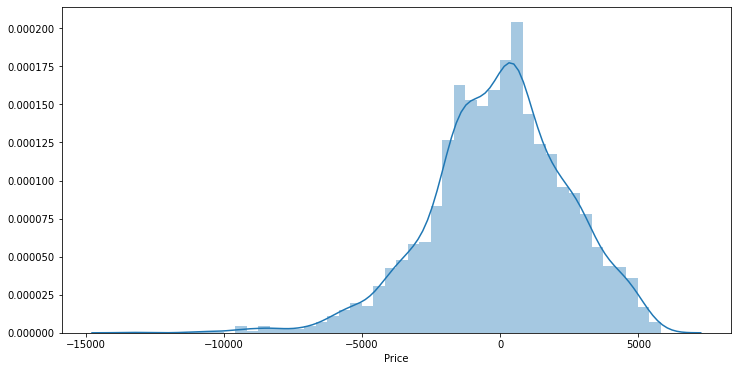

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(12,6))
sns.distplot((y_test-predictions.reshape(3300,)))

**Plotting the Model Losses**

In [49]:
#creating a dataframe
losses = pd.DataFrame(history.history)

In [50]:
losses.head()

,loss,mse,val_loss,val_mse
0,238301520.0,238301520.0,244323632.0,244323632.0
1,236845024.0,236845024.0,241022144.0,241022144.0
2,230154272.0,230154272.0,229546048.0,229546048.0
3,212257120.0,212257120.0,203517504.0,203517504.0
4,178297120.0,178297120.0,160214352.0,160214352.0


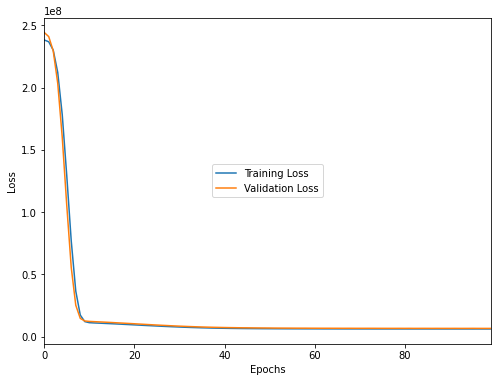

In [51]:
#plotting
plt.figure(figsize=(8,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
losses['loss'].plot(label='Training Loss')
losses['val_loss'].plot(label = 'Validation Loss')
plt.legend(loc = 'center')

The loss decreases as the model learns; increase in number of epochs. if the validation loss increases while the training loss decreases, it would mean the model is overfitting.

**Overfitting - Classification Problem**

In [52]:
#importing the neccessary dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#importing the dataset
df = pd.read_csv('transfusion.data')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [54]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [55]:
#data preparation - creating features and target variable
X = df.drop(['whether he/she donated blood in March 2007'],axis = 1)
y = df['whether he/she donated blood in March 2007']

In [56]:
# training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [57]:
#data preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
#building the model
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout

In [59]:
model = keras.Sequential([
    #passing layer- passing 20 neurons,input_dim: equal to number of features
    Dense(20,activation = 'relu',input_dim=4),
    Dense(15,activation = 'relu'),
    #means dropping 20% of the layers at this point to prevent overfitting
    Dropout(0.2),
    #creating output layer with actibvation using relu
    Dense(25,activation = 'relu'),
    #using sigmoid becaose we are predicting two classes
    Dense(1,activation=keras.activations.sigmoid)
    
])

In [60]:
#compiling the model
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
#fitting the model
#validation data: passing in the test data
history = model.fit(X_train,y_train,epochs=1600,validation_data = (X_test,y_test))

Epoch 1/1600
16/16 [==============================] - 0s 15ms/step - loss: 0.6766 - accuracy: 0.7485 - val_loss: 0.6543 - val_accuracy: 0.7449
Epoch 2/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.6383 - accuracy: 0.7705 - val_loss: 0.6144 - val_accuracy: 0.7449
Epoch 3/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.5963 - accuracy: 0.7705 - val_loss: 0.5758 - val_accuracy: 0.7449
Epoch 4/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.5583 - accuracy: 0.7705 - val_loss: 0.5509 - val_accuracy: 0.7449
Epoch 5/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.5356 - accuracy: 0.7705 - val_loss: 0.5411 - val_accuracy: 0.7449
Epoch 6/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.5137 - accuracy: 0.7705 - val_loss: 0.5357 - val_accuracy: 0.7449
Epoch 7/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.5235 - accuracy: 0.7705 - val_loss: 0.5308 - val_accuracy: 0.7449
Epoch

16/16 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.7824 - val_loss: 0.4781 - val_accuracy: 0.7895
Epoch 116/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.7804 - val_loss: 0.4783 - val_accuracy: 0.7895
Epoch 117/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4624 - accuracy: 0.7904 - val_loss: 0.4791 - val_accuracy: 0.7935
Epoch 118/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4598 - accuracy: 0.7864 - val_loss: 0.4807 - val_accuracy: 0.7814
Epoch 119/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.7824 - val_loss: 0.4801 - val_accuracy: 0.7814
Epoch 120/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.7864 - val_loss: 0.4789 - val_accuracy: 0.7854
Epoch 121/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4635 - accuracy: 0.7884 - val_loss: 0.4787 - val_accuracy: 0.7854
Epoch 1

Epoch 172/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7824 - val_loss: 0.4780 - val_accuracy: 0.7895
Epoch 173/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.7844 - val_loss: 0.4765 - val_accuracy: 0.7854
Epoch 174/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7745 - val_loss: 0.4781 - val_accuracy: 0.7895
Epoch 175/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.7764 - val_loss: 0.4779 - val_accuracy: 0.7976
Epoch 176/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4603 - accuracy: 0.7904 - val_loss: 0.4767 - val_accuracy: 0.7895
Epoch 177/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.7784 - val_loss: 0.4778 - val_accuracy: 0.7895
Epoch 178/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.7884 - val_loss: 0.4783 - val_accuracy:

Epoch 285/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4547 - accuracy: 0.7864 - val_loss: 0.4811 - val_accuracy: 0.8057
Epoch 286/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4566 - accuracy: 0.7804 - val_loss: 0.4784 - val_accuracy: 0.7935
Epoch 287/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7844 - val_loss: 0.4788 - val_accuracy: 0.7854
Epoch 288/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4603 - accuracy: 0.7904 - val_loss: 0.4800 - val_accuracy: 0.7895
Epoch 289/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4558 - accuracy: 0.7864 - val_loss: 0.4792 - val_accuracy: 0.7935
Epoch 290/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4559 - accuracy: 0.7804 - val_loss: 0.4788 - val_accuracy: 0.7895
Epoch 291/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.7884 - val_loss: 0.4786 - val_accuracy:

Epoch 342/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4513 - accuracy: 0.7904 - val_loss: 0.4796 - val_accuracy: 0.7895
Epoch 343/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4564 - accuracy: 0.7685 - val_loss: 0.4799 - val_accuracy: 0.8057
Epoch 344/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.7964 - val_loss: 0.4797 - val_accuracy: 0.7854
Epoch 345/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4611 - accuracy: 0.7784 - val_loss: 0.4806 - val_accuracy: 0.7814
Epoch 346/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4559 - accuracy: 0.8064 - val_loss: 0.4797 - val_accuracy: 0.7854
Epoch 347/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.7864 - val_loss: 0.4798 - val_accuracy: 0.7854
Epoch 348/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4543 - accuracy: 0.7864 - val_loss: 0.4794 - val_accuracy:

Epoch 399/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.7904 - val_loss: 0.4794 - val_accuracy: 0.7976
Epoch 400/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4486 - accuracy: 0.7884 - val_loss: 0.4793 - val_accuracy: 0.7976
Epoch 401/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.7784 - val_loss: 0.4794 - val_accuracy: 0.7854
Epoch 402/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4588 - accuracy: 0.7804 - val_loss: 0.4810 - val_accuracy: 0.8097
Epoch 403/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4616 - accuracy: 0.7804 - val_loss: 0.4789 - val_accuracy: 0.7895
Epoch 404/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.7804 - val_loss: 0.4796 - val_accuracy: 0.7854
Epoch 405/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4493 - accuracy: 0.8004 - val_loss: 0.4812 - val_accuracy:

Epoch 456/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4487 - accuracy: 0.7904 - val_loss: 0.4795 - val_accuracy: 0.8057
Epoch 457/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4554 - accuracy: 0.7824 - val_loss: 0.4798 - val_accuracy: 0.8057
Epoch 458/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.7824 - val_loss: 0.4798 - val_accuracy: 0.7935
Epoch 459/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4510 - accuracy: 0.7904 - val_loss: 0.4805 - val_accuracy: 0.7976
Epoch 460/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4503 - accuracy: 0.7904 - val_loss: 0.4816 - val_accuracy: 0.8097
Epoch 461/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.7864 - val_loss: 0.4810 - val_accuracy: 0.8016
Epoch 462/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4497 - accuracy: 0.7804 - val_loss: 0.4799 - val_accuracy:

Epoch 513/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8044 - val_loss: 0.4809 - val_accuracy: 0.8097
Epoch 514/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.7984 - val_loss: 0.4808 - val_accuracy: 0.8057
Epoch 515/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.8004 - val_loss: 0.4818 - val_accuracy: 0.8057
Epoch 516/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4458 - accuracy: 0.8024 - val_loss: 0.4791 - val_accuracy: 0.8097
Epoch 517/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.7884 - val_loss: 0.4799 - val_accuracy: 0.8057
Epoch 518/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.8004 - val_loss: 0.4808 - val_accuracy: 0.8057
Epoch 519/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.7764 - val_loss: 0.4801 - val_accuracy:

Epoch 570/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.7884 - val_loss: 0.4797 - val_accuracy: 0.8016
Epoch 571/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4499 - accuracy: 0.8004 - val_loss: 0.4817 - val_accuracy: 0.8097
Epoch 572/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.7944 - val_loss: 0.4789 - val_accuracy: 0.8057
Epoch 573/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.7804 - val_loss: 0.4802 - val_accuracy: 0.8097
Epoch 574/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.7964 - val_loss: 0.4804 - val_accuracy: 0.8097
Epoch 575/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4536 - accuracy: 0.7984 - val_loss: 0.4838 - val_accuracy: 0.8097
Epoch 576/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.8004 - val_loss: 0.4800 - val_accuracy:

Epoch 627/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4466 - accuracy: 0.7824 - val_loss: 0.4816 - val_accuracy: 0.8138
Epoch 628/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4431 - accuracy: 0.8004 - val_loss: 0.4828 - val_accuracy: 0.8057
Epoch 629/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4440 - accuracy: 0.7884 - val_loss: 0.4823 - val_accuracy: 0.8097
Epoch 630/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4503 - accuracy: 0.7884 - val_loss: 0.4814 - val_accuracy: 0.8097
Epoch 631/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4410 - accuracy: 0.8064 - val_loss: 0.4835 - val_accuracy: 0.8057
Epoch 632/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.7984 - val_loss: 0.4811 - val_accuracy: 0.8097
Epoch 633/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4515 - accuracy: 0.7804 - val_loss: 0.4811 - val_accuracy:

Epoch 684/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4406 - accuracy: 0.7924 - val_loss: 0.4817 - val_accuracy: 0.8138
Epoch 685/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4422 - accuracy: 0.7984 - val_loss: 0.4821 - val_accuracy: 0.8016
Epoch 686/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4408 - accuracy: 0.7745 - val_loss: 0.4830 - val_accuracy: 0.8057
Epoch 687/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4426 - accuracy: 0.8064 - val_loss: 0.4815 - val_accuracy: 0.8016
Epoch 688/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.7924 - val_loss: 0.4801 - val_accuracy: 0.8097
Epoch 689/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4422 - accuracy: 0.7944 - val_loss: 0.4796 - val_accuracy: 0.8138
Epoch 690/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.7884 - val_loss: 0.4817 - val_accuracy:

Epoch 741/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 0.7864 - val_loss: 0.4811 - val_accuracy: 0.8016
Epoch 742/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.7964 - val_loss: 0.4804 - val_accuracy: 0.8057
Epoch 743/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4398 - accuracy: 0.7944 - val_loss: 0.4802 - val_accuracy: 0.8057
Epoch 744/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.7984 - val_loss: 0.4803 - val_accuracy: 0.8016
Epoch 745/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4416 - accuracy: 0.8064 - val_loss: 0.4806 - val_accuracy: 0.8016
Epoch 746/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4453 - accuracy: 0.7924 - val_loss: 0.4809 - val_accuracy: 0.8016
Epoch 747/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4399 - accuracy: 0.7904 - val_loss: 0.4819 - val_accuracy:

Epoch 854/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4328 - accuracy: 0.8024 - val_loss: 0.4840 - val_accuracy: 0.8057
Epoch 855/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4373 - accuracy: 0.8064 - val_loss: 0.4841 - val_accuracy: 0.8057
Epoch 856/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4442 - accuracy: 0.7944 - val_loss: 0.4845 - val_accuracy: 0.8057
Epoch 857/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4385 - accuracy: 0.8004 - val_loss: 0.4807 - val_accuracy: 0.7935
Epoch 858/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.7924 - val_loss: 0.4856 - val_accuracy: 0.7935
Epoch 859/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4409 - accuracy: 0.7884 - val_loss: 0.4854 - val_accuracy: 0.8057
Epoch 860/1600
16/16 [==============================] - 0s 5ms/step - loss: 0.4385 - accuracy: 0.8044 - val_loss: 0.4874 - val_accuracy:

Epoch 911/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4393 - accuracy: 0.7944 - val_loss: 0.4865 - val_accuracy: 0.8057
Epoch 912/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.8104 - val_loss: 0.4827 - val_accuracy: 0.8057
Epoch 913/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.8064 - val_loss: 0.4838 - val_accuracy: 0.8057
Epoch 914/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.7964 - val_loss: 0.4850 - val_accuracy: 0.8057
Epoch 915/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.8044 - val_loss: 0.4859 - val_accuracy: 0.8057
Epoch 916/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.8024 - val_loss: 0.4813 - val_accuracy: 0.8016
Epoch 917/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4484 - accuracy: 0.7844 - val_loss: 0.4844 - val_accuracy:

Epoch 968/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.8044 - val_loss: 0.4871 - val_accuracy: 0.8016
Epoch 969/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.8104 - val_loss: 0.4877 - val_accuracy: 0.8016
Epoch 970/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4324 - accuracy: 0.7964 - val_loss: 0.4854 - val_accuracy: 0.7976
Epoch 971/1600
16/16 [==============================] - 0s 6ms/step - loss: 0.4402 - accuracy: 0.7984 - val_loss: 0.4860 - val_accuracy: 0.7976
Epoch 972/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4372 - accuracy: 0.8004 - val_loss: 0.4882 - val_accuracy: 0.8097
Epoch 973/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.7964 - val_loss: 0.4862 - val_accuracy: 0.8057
Epoch 974/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4374 - accuracy: 0.8044 - val_loss: 0.4868 - val_accuracy:

Epoch 1025/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.7944 - val_loss: 0.4868 - val_accuracy: 0.7976
Epoch 1026/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.7944 - val_loss: 0.4905 - val_accuracy: 0.7976
Epoch 1027/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4351 - accuracy: 0.8024 - val_loss: 0.4915 - val_accuracy: 0.7976
Epoch 1028/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.7904 - val_loss: 0.4893 - val_accuracy: 0.7935
Epoch 1029/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4331 - accuracy: 0.8044 - val_loss: 0.4932 - val_accuracy: 0.7935
Epoch 1030/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4316 - accuracy: 0.8044 - val_loss: 0.4913 - val_accuracy: 0.7895
Epoch 1031/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4352 - accuracy: 0.7944 - val_loss: 0.4881 - val_ac

16/16 [==============================] - 0s 4ms/step - loss: 0.4341 - accuracy: 0.7944 - val_loss: 0.4951 - val_accuracy: 0.7854
Epoch 1138/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4322 - accuracy: 0.7984 - val_loss: 0.4958 - val_accuracy: 0.7976
Epoch 1139/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.7964 - val_loss: 0.4918 - val_accuracy: 0.8057
Epoch 1140/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4294 - accuracy: 0.7964 - val_loss: 0.4938 - val_accuracy: 0.8057
Epoch 1141/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4368 - accuracy: 0.7864 - val_loss: 0.4901 - val_accuracy: 0.7854
Epoch 1142/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4332 - accuracy: 0.7964 - val_loss: 0.4977 - val_accuracy: 0.7854
Epoch 1143/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.7864 - val_loss: 0.4924 - val_accuracy: 0.7976
E

16/16 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.7984 - val_loss: 0.4996 - val_accuracy: 0.7895
Epoch 1250/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.7944 - val_loss: 0.4933 - val_accuracy: 0.7935
Epoch 1251/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4299 - accuracy: 0.7984 - val_loss: 0.5013 - val_accuracy: 0.7976
Epoch 1252/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4277 - accuracy: 0.8084 - val_loss: 0.4949 - val_accuracy: 0.7976
Epoch 1253/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.8024 - val_loss: 0.4973 - val_accuracy: 0.7895
Epoch 1254/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.8044 - val_loss: 0.5043 - val_accuracy: 0.7976
Epoch 1255/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4287 - accuracy: 0.7844 - val_loss: 0.4938 - val_accuracy: 0.7935
E

16/16 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.8004 - val_loss: 0.4933 - val_accuracy: 0.7976
Epoch 1362/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4294 - accuracy: 0.8084 - val_loss: 0.4991 - val_accuracy: 0.7935
Epoch 1363/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.8084 - val_loss: 0.5041 - val_accuracy: 0.7935
Epoch 1364/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4271 - accuracy: 0.8044 - val_loss: 0.4995 - val_accuracy: 0.8016
Epoch 1365/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.7964 - val_loss: 0.5028 - val_accuracy: 0.7935
Epoch 1366/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4335 - accuracy: 0.8064 - val_loss: 0.5012 - val_accuracy: 0.7976
Epoch 1367/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4279 - accuracy: 0.8004 - val_loss: 0.4975 - val_accuracy: 0.7976
E

16/16 [==============================] - 0s 4ms/step - loss: 0.4293 - accuracy: 0.8024 - val_loss: 0.5084 - val_accuracy: 0.7895
Epoch 1474/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4351 - accuracy: 0.7964 - val_loss: 0.5045 - val_accuracy: 0.7935
Epoch 1475/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4278 - accuracy: 0.8084 - val_loss: 0.5050 - val_accuracy: 0.8016
Epoch 1476/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4342 - accuracy: 0.7944 - val_loss: 0.5096 - val_accuracy: 0.7935
Epoch 1477/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4352 - accuracy: 0.7904 - val_loss: 0.5009 - val_accuracy: 0.7976
Epoch 1478/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.7944 - val_loss: 0.5053 - val_accuracy: 0.7935
Epoch 1479/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4329 - accuracy: 0.7984 - val_loss: 0.5017 - val_accuracy: 0.7895
E

16/16 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.7884 - val_loss: 0.5077 - val_accuracy: 0.7854
Epoch 1586/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.8084 - val_loss: 0.5036 - val_accuracy: 0.7895
Epoch 1587/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8164 - val_loss: 0.5065 - val_accuracy: 0.7814
Epoch 1588/1600
16/16 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8104 - val_loss: 0.5050 - val_accuracy: 0.7935
Epoch 1589/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4231 - accuracy: 0.8104 - val_loss: 0.5039 - val_accuracy: 0.7976
Epoch 1590/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4195 - accuracy: 0.8004 - val_loss: 0.5049 - val_accuracy: 0.7935
Epoch 1591/1600
16/16 [==============================] - 0s 4ms/step - loss: 0.4300 - accuracy: 0.8064 - val_loss: 0.5035 - val_accuracy: 0.7854
E

In [62]:
#checking the model loss
losses = pd.DataFrame(history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.676552,0.748503,0.654318,0.744939
1,0.638256,0.770459,0.614378,0.744939
2,0.596349,0.770459,0.575753,0.744939
3,0.558301,0.770459,0.550881,0.744939
4,0.535621,0.770459,0.541099,0.744939


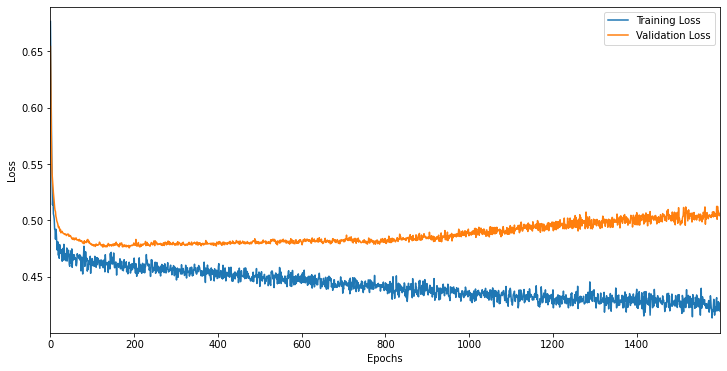

In [63]:
#plotting the loss
plt.figure(figsize =(12,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
losses['loss'].plot(label = 'Training Loss')
losses['val_loss'].plot(label = 'Validation Loss')
plt.legend(loc = 0)


We can notice from the above plot that the model is overfitting as the validation loss is increasing as the training loss decreases.

In [64]:
#evaluating the model
model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.5062 - accuracy: 0.7895


[0.5062319040298462, 0.7894737124443054]

In [65]:
#Making predictions
predictions = model.predict(X_test)
import numpy as np
np.set_printoptions(suppress = True)

In [66]:
predictions_df = pd.DataFrame(predictions.round(3),columns = ['Prediction'])

In [67]:
predictions_df.head()

,Prediction
0,0.086
1,0.555
2,0.043
3,0.052
4,0.100


In [68]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 1 columns):
Prediction    247 non-null float32
dtypes: float32(1)
memory usage: 1.1 KB


In [69]:
#adding rows to the df
predictions_df['Row_ID'] = range(0,247)
predictions_df.tail()

,Prediction,Row_ID
242,0.328,242
243,0.069,243
244,0.196,244
245,0.546,245
246,0.072,246


In [70]:
#checking the maximum prediction
predictions_df['Prediction'].max()

0.6179999709129333

In [71]:
#checking the minimum prediction
predictions_df['Prediction'].min()

0.0

In [72]:
#Making the predictions true or false
predictions = predictions>0.5

In [73]:
#checking the performance metric
from sklearn.metrics import classification_report
print(classification_report(predictions.reshape(247,),y_test))

              precision    recall  f1-score   support

       False       0.91      0.82      0.87       204
        True       0.43      0.63      0.51        43

    accuracy                           0.79       247
   macro avg       0.67      0.73      0.69       247
weighted avg       0.83      0.79      0.80       247



**Keras Callbacks**

In [74]:
#importing the dataset
df = pd.read_csv('transfusion.data')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [85]:
#data preparation - creating features and target variable
X = df.drop(['whether he/she donated blood in March 2007'],axis = 1)
y = df['whether he/she donated blood in March 2007']

In [113]:
# training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [114]:
#Datapreprocessing using StandardScaler
from sklearn.preprocessing import StandardScaler
#The StandardScaler tranforms the values to have a mean of 0 and a standard deviation of 1
sc = StandardScaler()

In [115]:
#transforming the data
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [116]:
#building the model
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout

In [117]:
model = keras.Sequential([
    #passing layer- passing 20 neurons,input_dim: equal to number of features
    Dense(20,activation = 'relu',input_dim=4),
    Dense(15,activation = 'relu'),
    #means dropping 20% of the layers at this point to prevent overfitting
    Dropout(0.2),
    #creating output layer with actibvation using relu
    Dense(25,activation = 'relu'),
    #using sigmoid becaose we are predicting two classes
    Dense(1,activation=keras.activations.sigmoid)
    
])

In [118]:
#compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [119]:
#How to stop the model when its no longer learning; improving with increasing epochs
from tensorflow.keras.callbacks import EarlyStopping
#list of callback, patience: checks that the model has stopped improving after 20 epochs
#mode: to maximize accuracy
callbacks = [
    EarlyStopping(patience = 20,mode = 'max',monitor='accuracy')    
]

In [120]:
#fitting the model
history = model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),
                   callbacks = callbacks)

Epoch 1/600
17/17 [==============================] - 0s 16ms/step - loss: 0.6937 - accuracy: 0.5277 - val_loss: 0.6460 - val_accuracy: 0.7333
Epoch 2/600
17/17 [==============================] - 0s 4ms/step - loss: 0.6389 - accuracy: 0.7380 - val_loss: 0.5985 - val_accuracy: 0.7467
Epoch 3/600
17/17 [==============================] - 0s 4ms/step - loss: 0.5972 - accuracy: 0.7648 - val_loss: 0.5647 - val_accuracy: 0.7467
Epoch 4/600
17/17 [==============================] - 0s 4ms/step - loss: 0.5571 - accuracy: 0.7686 - val_loss: 0.5323 - val_accuracy: 0.7467
Epoch 5/600
17/17 [==============================] - 0s 4ms/step - loss: 0.5165 - accuracy: 0.7667 - val_loss: 0.5134 - val_accuracy: 0.7467
Epoch 6/600
17/17 [==============================] - 0s 4ms/step - loss: 0.5107 - accuracy: 0.7686 - val_loss: 0.5008 - val_accuracy: 0.7467
Epoch 7/600
17/17 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.7763 - val_loss: 0.4945 - val_accuracy: 0.7467
Epoch 8/600


In [121]:
#checking the model loss
losses = pd.DataFrame(history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.693689,0.527725,0.646032,0.733333
1,0.638917,0.738050,0.598541,0.746667
2,0.597234,0.764818,0.564715,0.746667
3,0.557101,0.768642,0.532275,0.746667
4,0.516542,0.766730,0.513408,0.746667


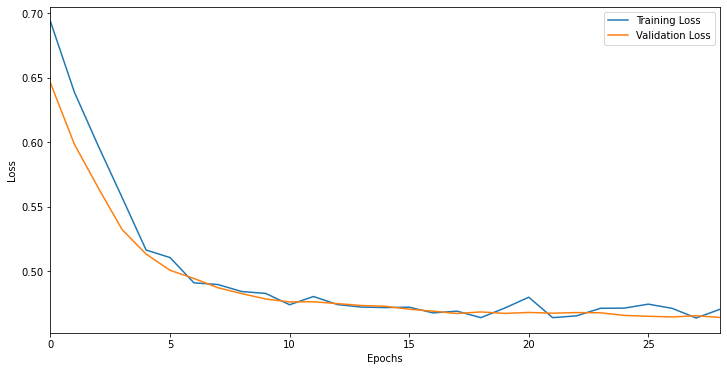

In [122]:
#plotting the loss
plt.figure(figsize =(12,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
losses['loss'].plot(label = 'Training Loss')
losses['val_loss'].plot(label = 'Validation Loss')
plt.legend(loc = 0)

In [127]:
#Making predictions
predictions = model.predict(X_test)

In [128]:
#Making the predictions true or false
predictions = predictions>0.5

In [129]:
predictions.shape

(225, 1)

In [130]:
y_test.shape

(225,)

In [132]:
#checking the performance metric
from sklearn.metrics import classification_report
print(classification_report(predictions.reshape(225,),y_test))

              precision    recall  f1-score   support

       False       0.98      0.78      0.87       211
        True       0.19      0.79      0.31        14

    accuracy                           0.78       225
   macro avg       0.59      0.78      0.59       225
weighted avg       0.93      0.78      0.84       225



**Custom Keras Callbacks**

In [133]:
class CustomCallBack(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.metrics = []

    def on_batch_end(self, batch, logs={}):
        self.metrics.append(logs.get('mse'))

In [134]:
from tensorflow.keras.callbacks import EarlyStopping
custom_callback = CustomCallBack()

In [135]:
callbacks = [
            custom_callback,
            EarlyStopping(patience = 30,mode='min',monitor='val_loss')

            ]

In [136]:
history = model.fit(X_train,y_train,epochs=600,validation_split = 0.2,callbacks=callbacks)

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4842 - accuracy: 0.7751 - val_loss: 0.3709 - val_accuracy: 0.8381
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4804 - accuracy: 0.7895 - val_loss: 0.3867 - val_accuracy: 0.8381
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5015 - accuracy: 0.7727 - val_loss: 0.3830 - val_accuracy: 0.8381
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4807 - accuracy: 0.7679 - val_loss: 0.3782 - val_accuracy: 0.8381
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4967 - accuracy: 0.7751 - val_loss: 0.3750 - val_accuracy: 0.8381
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.7847 - val_loss: 0.3891 - val_accuracy: 0.8381
Epoch 7/600
14/14 [==============================] - ETA: 0s - loss: 0.3643 - accuracy: 0.81 - 0s 4ms/step - loss: 0.4874 - accuracy: 0.7775 - val_loss: 0

In [137]:
pd.DataFrame(custom_callback.metrics).head()

,0
0,None
1,None
2,None
3,None
4,None


**TF Syntax Basics**

# Deep Learning DeepDive